<a href="https://colab.research.google.com/github/AhmadMugiar/Algoritma-Apriori-Restaurant-Sebelas-Rasa/blob/main/SEBELAS_RASA_APRIORI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAD DATA

In [ ]:
pip install apyori

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

import datetime

In [ ]:
df = pd.read_csv('/content/Data Transaksi Sebelas Rasa - All Riwayat Transaksi.csv')
df

,No. Struk,Tanggal,Jam,Nama Outlet,Nama Kasir,Nama Pelangan,Produk,Opsi Tambahan,Jumlah Produk,Jumlah Dibatalkan,...,Tipe Diskon Produk,Diskon Transaksi,Tipe Diskon Transaksi,Redeem Poin,Pajak,Total,Status,Kode Pembayaran,Metode Pembayaran,No. Referensi
0,38120JT6,08-10-2023,20:20:53,Sebelas Rasa,myrtana,NaN,3,NaN,1,0,...,NaN,0,NaN,NaN,0,3500,Transaksi,NaN,CASH,NaN
1,42518OFV,21-11-2023,18:03:34,Sebelas Rasa,myrtana,NaN,+ telur,NaN,1,0,...,NaN,0,NaN,NaN,0,3000,Transaksi,64,DEBIT,NaN
2,04816MSL,17-02-2023,16:18:44,Sebelas Rasa,myrtana,NaN,Add sayuran salad,NaN,1,0,...,NaN,0,NaN,NaN,0,3000,Transaksi,NaN,CASH,NaN
3,41218XRD,30-07-2024,18:40:27,Sebelas Rasa,myrtana,NaN,Air es,NaN,1,0,...,NaN,0,NaN,NaN,0,2000,Transaksi,NaN,CASH,NaN
4,41019E35,28-07-2024,19:13:28,Sebelas Rasa,myrtana,NaN,Air es,NaN,1,0,...,NaN,0,NaN,NaN,0,2000,Transaksi,NaN,CASH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41628,17619WB8,16-03-2024,19:12:42,Sebelas Rasa,myrtana,NaN,Yummy Dimsum,NaN,1,0,...,NaN,0,NaN,NaN,0,15000,Transaksi,NaN,CASH,NaN
41629,17618P9X,16-03-2024,18:33:20,Sebelas Rasa,myrtana,NaN,Yummy Dimsum,NaN,1,0,...,NaN,0,NaN,NaN,0,15000,Transaksi,NaN,CASH,NaN
41630,17520JNK,15-03-2024,20:46:11,Sebelas Rasa,myrtana,NaN,Yummy Dimsum,NaN,1,0,...,NaN,0,NaN,NaN,0,15000,Transaksi,NaN,CASH,NaN
41631,17419XU7,14-03-2024,19:39:42,Sebelas Rasa,myrtana,NaN,Yummy Dimsum,NaN,1,0,...,NaN,0,NaN,NaN,0,15000,Transaksi,NaN,CASH,NaN


#EKSPLORASI DATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41633 entries, 0 to 41632
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No. Struk              41633 non-null  object 
 1   Tanggal                41633 non-null  object 
 2   Jam                    41633 non-null  object 
 3   Nama Outlet            41633 non-null  object 
 4   Nama Kasir             41633 non-null  object 
 5   Nama Pelangan          0 non-null      float64
 6   Produk                 41633 non-null  object 
 7   Opsi Tambahan          0 non-null      float64
 8   Jumlah Produk          41633 non-null  int64  
 9   Jumlah Dibatalkan      41633 non-null  int64  
 10  Harga Per Produk       41633 non-null  int64  
 11  Subtotal               41633 non-null  int64  
 12  Tipe Harga             41633 non-null  object 
 13  Diskon Produk          41633 non-null  int64  
 14  Tipe Diskon Produk     69 non-null     object 
 15  Di

In [ ]:
df.isna().sum()

,0
No. Struk,0
Tanggal,0
Jam,0
Nama Outlet,0
Nama Kasir,0
Nama Pelangan,41633
Produk,0
Opsi Tambahan,41633
Jumlah Produk,0
Jumlah Dibatalkan,0


#CLEANING DATA
MEMISAHKAN ROW YANG DIDALAM SATU ROW TERDAPAT BEBERAPA PESANAN

In [ ]:
def split_and_duplicate(row):
    if "+" in row['Produk']:
        Produks = [item.strip() for item in row['Produk'].split('+')]
        rows = []
        for Produk in Produks:
            new_row = row.copy()
            new_row['Produk'] = Produk
            rows.append(new_row)
        return pd.DataFrame(rows)
    else:
        return pd.DataFrame([row])

df_split = pd.concat([split_and_duplicate(row) for _, row in df.iterrows()], ignore_index=True)

print(df_split)

      No. Struk     Tanggal       Jam   Nama Outlet Nama Kasir  Nama Pelangan  \
0      38120JT6  08-10-2023  20:20:53  Sebelas Rasa    myrtana            NaN   
1      42518OFV  21-11-2023  18:03:34  Sebelas Rasa    myrtana            NaN   
2      42518OFV  21-11-2023  18:03:34  Sebelas Rasa    myrtana            NaN   
3      04816MSL  17-02-2023  16:18:44  Sebelas Rasa    myrtana            NaN   
4      41218XRD  30-07-2024  18:40:27  Sebelas Rasa    myrtana            NaN   
...         ...         ...       ...           ...        ...            ...   
49339  17619WB8  16-03-2024  19:12:42  Sebelas Rasa    myrtana            NaN   
49340  17618P9X  16-03-2024  18:33:20  Sebelas Rasa    myrtana            NaN   
49341  17520JNK  15-03-2024  20:46:11  Sebelas Rasa    myrtana            NaN   
49342  17419XU7  14-03-2024  19:39:42  Sebelas Rasa    myrtana            NaN   
49343  184185YB  24-03-2024  18:45:45  Sebelas Rasa    myrtana            NaN   

                  Produk  O

In [ ]:
df_cleaned = df_split.drop(columns=['Nama Pelangan', 'Opsi Tambahan', 'Tipe Diskon Produk', 'Tipe Diskon Transaksi', 'Redeem Poin', 'Kode Pembayaran', 'No. Referensi'])

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49344 entries, 0 to 49343
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   No. Struk          49344 non-null  object
 1   Tanggal            49344 non-null  object
 2   Jam                49344 non-null  object
 3   Nama Outlet        49344 non-null  object
 4   Nama Kasir         49344 non-null  object
 5   Produk             49344 non-null  object
 6   Jumlah Produk      49344 non-null  int64 
 7   Jumlah Dibatalkan  49344 non-null  int64 
 8   Harga Per Produk   49344 non-null  int64 
 9   Subtotal           49344 non-null  int64 
 10  Tipe Harga         49344 non-null  object
 11  Diskon Produk      49344 non-null  int64 
 12  Diskon Transaksi   49344 non-null  int64 
 13  Pajak              49344 non-null  int64 
 14  Total              49344 non-null  int64 
 15  Status             49344 non-null  object
 16  Metode Pembayaran  49344 non-null  objec

In [ ]:
df_cleaned.head()

,No. Struk,Tanggal,Jam,Nama Outlet,Nama Kasir,Produk,Jumlah Produk,Jumlah Dibatalkan,Harga Per Produk,Subtotal,Tipe Harga,Diskon Produk,Diskon Transaksi,Pajak,Total,Status,Metode Pembayaran
0,38120JT6,08-10-2023,20:20:53,Sebelas Rasa,myrtana,3,1,0,3500,3500,Normal,0,0,0,3500,Transaksi,CASH
1,42518OFV,21-11-2023,18:03:34,Sebelas Rasa,myrtana,,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,DEBIT
2,42518OFV,21-11-2023,18:03:34,Sebelas Rasa,myrtana,telur,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,DEBIT
3,04816MSL,17-02-2023,16:18:44,Sebelas Rasa,myrtana,Add sayuran salad,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,CASH
4,41218XRD,30-07-2024,18:40:27,Sebelas Rasa,myrtana,Air es,1,0,2000,2000,Normal,0,0,0,2000,Transaksi,CASH


In [ ]:
df_cleaned.nunique()

,0
No. Struk,7724
Tanggal,463
Jam,6342
Nama Outlet,1
Nama Kasir,1
Produk,376
Jumlah Produk,45
Jumlah Dibatalkan,9
Harga Per Produk,67
Subtotal,183


#PENYERAGAMAN NAMA MENU YANG TIDAK KONSISTEN PADA TIAP PESANAN DENGAN DATA VALIDASI

Mengubah menjadi lowercase agar memudahkan pengecekan

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.lower()
df_cleaned.Produk.nunique()

342

Menyesuaikan penulisan menu dengan data validasi menggunakan regex

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*geprek.*', 'Ayam Geprek', regex=True)
df_cleaned.Produk.nunique()

335

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*bebek.*', 'Bebek Goreng', regex=True)
df_cleaned.Produk.nunique()

323

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kepala.*', 'Ayam Kepala', regex=True)
df_cleaned.Produk.nunique()

320

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*ati.*', 'Ati Ayam', regex=True)
df_cleaned.Produk.nunique()

317

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\b(ice|es)\b)(?=.*\b(lingzi|lingzhi)\b).*',
    'Ice Lingzhi Squash',
    regex=True
)
df_cleaned.Produk.nunique()

316

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*\b(lingzi|lingzhi)\b.*', 'Wedang Lingzhi + Jahe', regex=True)
df_cleaned.Produk.nunique()

302

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kangkung.*', 'Ca Kangkung', regex=True)
df_cleaned.Produk.nunique()

299

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*mangesti.*', 'Wedang Mangesti Luhur', regex=True)
df_cleaned.Produk.nunique()

293

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*ambangun.*', 'Wedang Ambangun Negoro', regex=True)
df_cleaned.Produk.nunique()

291

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\btopping\b)(?=.*\bslice\b).*',
    'Topping Ekstra Slice BBQ Chicken',
    regex=True
)
df_cleaned.Produk.nunique()

291

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*mendoan.*', 'Tempe Mendoan', regex=True)
df_cleaned.Produk.nunique()

289

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\bkebab\b)(?=.*\bsalad\b).*',
    'Salad Kebab',
    regex=True
)
df_cleaned.Produk.nunique()

289

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*slice.*', 'Salad Slice BBQ Chicken', regex=True)
df_cleaned.Produk.nunique()

280

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kebab.*', 'Topping Ekstra Kebab', regex=True)
df_cleaned.Produk.nunique()

276

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kembang ungu.*', 'Wedang Kembang Ungu', regex=True)
df_cleaned.Produk.nunique()

273

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*mineral.*', 'Air Mineral', regex=True)
df_cleaned.Produk.nunique()

269

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kopi gunung, mix.*', 'Kopi Gunung Mix Jahe', regex=True)
df_cleaned.Produk.nunique()

268

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kampung.*', 'Ayam Kampung Goreng', regex=True)
df_cleaned.Produk.nunique()

259

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*potong.*', 'Ayam Potong Goreng', regex=True)
df_cleaned.Produk.nunique()

252

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*salad jamur.*', 'Salad Jamur', regex=True)
df_cleaned.Produk.nunique()

252

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*jamur.*', 'Jamur Crispy', regex=True)
df_cleaned.Produk.nunique()

251

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*chicken katsu salad.*', 'Salad Chicken Katsu', regex=True)
df_cleaned.Produk.nunique()

248

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*nasi telur.*', 'Nasi Telur Sambal Bawang', regex=True)
df_cleaned.Produk.nunique()

248

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*sambal.*', 'Topping Ekstra Sambal', regex=True)
df_cleaned.Produk.nunique()

244

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*sop.*', 'Sop Ayam', regex=True)
df_cleaned.Produk.nunique()

242

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*bayam.*', 'Keripik Bayam', regex=True)
df_cleaned.Produk.nunique()

242

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*ayam.*', 'Ayam Kampung Goreng', regex=True)
df_cleaned.Produk.nunique()

228

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*bandeng.*', 'Bandeng', regex=True)
df_cleaned.Produk.nunique()

226

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kopi gunung, original.*', 'Kopi Gunung Original', regex=True)
df_cleaned.Produk.nunique()

225

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kopi tubruk.*', 'Kopi Tubruk', regex=True)
df_cleaned.Produk.nunique()

223

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kopi susu.*', 'Kopi Susu Gula Semut', regex=True)
df_cleaned.Produk.nunique()

223

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kopi gula aren.*', 'Kopi Gula Aren', regex=True)
df_cleaned.Produk.nunique()

222

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*argo budoyo.*', 'Wedang Argo Budoyo', regex=True)
df_cleaned.Produk.nunique()

220

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*chopped.*', 'Salad Chopped Chicken', regex=True)
df_cleaned.Produk.nunique()

219

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*salad jagung.*', 'Salad Jagung', regex=True)
df_cleaned.Produk.nunique()

219

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*jagung.*', 'Topping Ekstra Jagung', regex=True)
df_cleaned.Produk.nunique()

218

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*salad mini.*', 'Salad Mini', regex=True)
df_cleaned.Produk.nunique()

218

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*pare.*', 'Keripik Pare', regex=True)
df_cleaned.Produk.nunique()

218

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*\b(pegangan|pegagan)\b.*', 'Keripik Pegagan', regex=True)
df_cleaned.Produk.nunique()

217

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*keripik sayur.*', 'Keripik Sayur', regex=True)
df_cleaned.Produk.nunique()

217

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*mayo.*', 'Topping Ekstra Mayonaise', regex=True)
df_cleaned.Produk.nunique()

214

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*padang.*', 'Sego Sambel Telur Padang', regex=True)
df_cleaned.Produk.nunique()

214

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*oseng telur.*', 'Oseng Telur', regex=True)
df_cleaned.Produk.nunique()

211

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*telur dadar.*', 'Telur Dadar / Ceplok', regex=True)
df_cleaned.Produk.nunique()

211

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*telur.*', 'Topping Ekstra Telur', regex=True)
df_cleaned.Produk.nunique()

204

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*sosis solo goreng.*', 'Sosis Solo Goreng', regex=True)
df_cleaned.Produk.nunique()

204

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*solo.*', 'Sosis Solo Basah', regex=True)
df_cleaned.Produk.nunique()

204

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*sosis goreng.*', 'Sosis Goreng', regex=True)
df_cleaned.Produk.nunique()

204

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*sosis.*', 'Topping Ekstra Sosis', regex=True)
df_cleaned.Produk.nunique()

198

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*nyemek.*', 'Mie Nyemek', regex=True)
df_cleaned.Produk.nunique()

197

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*straw.*', 'Strawbery Yakult', regex=True)
df_cleaned.Produk.nunique()

196

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*yoghurt.*', 'Melon Yoghurt', regex=True)
df_cleaned.Produk.nunique()

196

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*melon yakult.*', 'Melon Yakult', regex=True)
df_cleaned.Produk.nunique()

196

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*mango yakult.*', 'Mango Yakult', regex=True)
df_cleaned.Produk.nunique()

196

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*\b(mango|manggo)\b.*', 'Mango Mojito', regex=True)
df_cleaned.Produk.nunique()

195

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*mamoja.*', 'Mamoja', regex=True)
df_cleaned.Produk.nunique()

195

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*drip.*', 'Vietnam Drip', regex=True)
df_cleaned.Produk.nunique()

194

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*lime with blue pea, hot.*', 'Lime with Blue Pea Hot', regex=True)
df_cleaned.Produk.nunique()

194

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*blue.*', 'Lime with Blue Pea Ice', regex=True)
df_cleaned.Produk.nunique()

190

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*lemongrass.*', 'Lime with Lemongrass Ice', regex=True)
df_cleaned.Produk.nunique()

189

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\brosella\b)(?=.*\bhot\b).*',
    'Lime with Rosella Hot',
    regex=True
)
df_cleaned.Produk.nunique()

189

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*rosella.*', 'Lime with Rosella Ice', regex=True)
df_cleaned.Produk.nunique()

187

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\bjeruk\b)(?=.*\bhot|hangat\b).*',
    'Jeruk Hangat',
    regex=True
)
df_cleaned.Produk.nunique()

187

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*jeruk.*', 'Jeruk Es', regex=True)
df_cleaned.Produk.nunique()

184

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\bkampul\b)(?=.*\b(hot|hangat)\b).*',
    'Teh Kampul Hot',
    regex=True
)
df_cleaned.Produk.nunique()

183

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kampul.*', 'Teh Kampul Ice', regex=True)
df_cleaned.Produk.nunique()

182

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\b(nasi|rice)\b)(?=.*\bkatsu\b).*',
    'Rice Bowl Chicken Katsu',
    regex=True
)
df_cleaned.Produk.nunique()

180

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*katsu.*', 'Katsu Goreng', regex=True)
df_cleaned.Produk.nunique()

179

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*yummy.*', 'Yummy Dimsum', regex=True)
df_cleaned.Produk.nunique()

178

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\bsingkong\b)(?=.*\bkeju\b).*',
    'Singkong Keju',
    regex=True
)
df_cleaned.Produk.nunique()

178

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*singkong.*', 'Singkong Goreng', regex=True)
df_cleaned.Produk.nunique()

176

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*pisang krispy.*', 'Pisang Krispy', regex=True)
df_cleaned.Produk.nunique()

176

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*pisang rebus.*', 'Pisang Rebus', regex=True)
df_cleaned.Produk.nunique()

176

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*pisang.*', 'Pisang Goreng', regex=True)
df_cleaned.Produk.nunique()

176

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*\b(pineaple|pineapple)\b.*', 'Lime with Pineaple Ice', regex=True)
df_cleaned.Produk.nunique()

174

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kunir.*', 'Jamu Kunir Asem', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kangkung.*', 'Ca Kangkung', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*susu putih.*', 'Es Susu Putih', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*butterfly.*', 'Butterfly Pea Tea', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*cookies.*', 'Cookies & Cream', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*caren.*', 'Es Caren', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*french.*', 'French Fries', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*gudeg.*', 'Gudeg', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kencur.*', 'Jamu Beras Kencur', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kangkung.*', 'Ca Kangkung', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*susu putih.*', 'Es Susu Putih', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*butterfly.*', 'Butterfly Pea Tea', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*cookies.*', 'Cookies & Cream', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*caren.*', 'Es Caren', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*french.*', 'French Fries', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*gudeg.*', 'Gudeg', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kencur.*', 'Jamu Beras Kencur', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kacang.*', 'Kacang Rebus', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*sayur asem.*', 'Sayur Asem', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*asem.*', 'Jamu Gula Asem', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*kulit.*', 'Kerupuk Kulit', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*racik.*', 'Kopi Racik Khas Sebelas Rasa', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\blychee\b)(?=.*\bhot\b).*',
    'Lychee Tea Hot',
    regex=True
)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*lychee.*', 'Lychee Tea Ice', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*platter.*', 'Mix Platter', regex=True)
df_cleaned.Produk.nunique()

173

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*nugget.*', 'Nugget Goreng', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*omelette.*', 'Omelette', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*blackpepper.*', 'Rice Bowl Chicken Blackpepper', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*bulgogi.*', 'Rice Bowl Chicken Bulgogi', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*salt.*', 'Rice Bowl Chicken Chili & Salt', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*teriyaki.*', 'Rice Bowl Chicken Teriyaki', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*matah.*', 'Rice Bowl Sambel Matah', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*gochujang.*', 'Rice Bowl Chicken Gochujang', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*sausage.*', 'Salad Sausage', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*lodeh.*', 'Sayur Lodeh', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*basic.*', 'Salad Basic', regex=True)
df_cleaned.Produk.nunique()

172

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*salad.*', 'Salad', regex=True)
df_cleaned.Produk.nunique()

167

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*tahu.*', 'Tahu Goreng Sambel Kecap', regex=True)
df_cleaned.Produk.nunique()

166

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*serai.*', 'Teh Serai', regex=True)
df_cleaned.Produk.nunique()

166

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*timus.*', 'Timus Ungu', regex=True)
df_cleaned.Produk.nunique()

165

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*selada.*', 'Topping Ekstra Selada', regex=True)
df_cleaned.Produk.nunique()

165

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*udang.*', 'Udang Rambutan', regex=True)
df_cleaned.Produk.nunique()

164

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*wijen.*', 'Topping Ekstra Wijen', regex=True)
df_cleaned.Produk.nunique()

164

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\bteh\b)(?=.*\b(hot|hangat)\b).*',
    'Teh Hot',
    regex=True
)
df_cleaned.Produk.nunique()

163

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*teh.*', 'Teh Ice', regex=True)
df_cleaned.Produk.nunique()

156

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*susu coklat hangat.*', 'Susu Coklat Hangat', regex=True)
df_cleaned.Produk.nunique()

156

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*susu coklat.*', 'Susu Coklat Es', regex=True)
df_cleaned.Produk.nunique()

156

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\bcoklat\b)(?=.*\b(hot|hangat|panas)\b).*',
    'Coklat Hangat',
    regex=True
)
df_cleaned.Produk.nunique()

156

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*coklat.*', 'Coklat Es', regex=True)
df_cleaned.Produk.nunique()

156

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(
    r'(?=.*\bair\b)(?=.*\b(ice|es|dingin)\b).*',
    'Air Es',
    regex=True
)
df_cleaned.Produk.nunique()

156

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*air.*', 'Air Hangat', regex=True)
df_cleaned.Produk.nunique()

155

In [ ]:
df_cleaned['Produk'] = df_cleaned['Produk'].str.replace(r'.*aqua.*', 'Air Mineral', regex=True)
df_cleaned.Produk.nunique()

154

In [ ]:
df_cleaned.Produk.unique()

array(['3', '', 'Topping Ekstra Telur', 'Salad', 'Air Es', 'Air Mineral',
       'Air Hangat', 'Topping Ekstra Sambal', 'Wedang Argo Budoyo',
       'Ati Ayam', 'Ayam Kampung Goreng', 'Ayam Geprek', 'nasi',
       'nasi setengah', 'Ayam Potong Goreng', 'Teh Ice', 'Ayam Kepala',
       'Bandeng', 'Salad Basic', 'Bebek Goreng', 'bekroll', 'Ca Kangkung',
       'Jamu Beras Kencur', 'Jamu Kunir Asem', 'buah',
       'Butterfly Pea Tea', 'cek', 'Salad Chicken Katsu',
       'Salad Chopped Chicken', 'Coklat Hangat', 'Coklat Es',
       'Cookies & Cream', 'Topping Ekstra Jagung',
       'Topping Ekstra Mayonaise', 'Topping Ekstra Sosis', 'elzhi plus',
       'es batu', 'Es Caren', 'Jeruk Es', 'Kopi Gula Aren',
       'Es Susu Putih', 'extra es batu', 'Topping Ekstra Kebab',
       'Topping Ekstra Wijen', 'French Fries', 'Udang Rambutan',
       'healthy family', 'herba plus capsule', 'Lime with Blue Pea Ice',
       'Lime with Lemongrass Ice', 'Lime with Pineaple Ice',
       'Lime with Rosel

In [ ]:
df_cleaned

,No. Struk,Tanggal,Jam,Nama Outlet,Nama Kasir,Produk,Jumlah Produk,Jumlah Dibatalkan,Harga Per Produk,Subtotal,Tipe Harga,Diskon Produk,Diskon Transaksi,Pajak,Total,Status,Metode Pembayaran
0,38120JT6,08-10-2023,20:20:53,Sebelas Rasa,myrtana,3,1,0,3500,3500,Normal,0,0,0,3500,Transaksi,CASH
1,42518OFV,21-11-2023,18:03:34,Sebelas Rasa,myrtana,,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,DEBIT
2,42518OFV,21-11-2023,18:03:34,Sebelas Rasa,myrtana,Topping Ekstra Telur,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,DEBIT
3,04816MSL,17-02-2023,16:18:44,Sebelas Rasa,myrtana,Salad,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,CASH
4,41218XRD,30-07-2024,18:40:27,Sebelas Rasa,myrtana,Air Es,1,0,2000,2000,Normal,0,0,0,2000,Transaksi,CASH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49339,17619WB8,16-03-2024,19:12:42,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH
49340,17618P9X,16-03-2024,18:33:20,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH
49341,17520JNK,15-03-2024,20:46:11,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH
49342,17419XU7,14-03-2024,19:39:42,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH


#Validasi Data

In [ ]:
df_cleaned.to_csv('validasi-data-restoran.csv', index=False)

In [ ]:
validation_df = pd.read_csv('/content/validasi-data-restoran.csv')
validation_df.head(5)

,No. Struk,Tanggal,Jam,Nama Outlet,Nama Kasir,Produk,Jumlah Produk,Jumlah Dibatalkan,Harga Per Produk,Subtotal,Tipe Harga,Diskon Produk,Diskon Transaksi,Pajak,Total,Status,Metode Pembayaran
0,38120JT6,08-10-2023,20:20:53,Sebelas Rasa,myrtana,3,1,0,3500,3500,Normal,0,0,0,3500,Transaksi,CASH
1,42518OFV,21-11-2023,18:03:34,Sebelas Rasa,myrtana,NaN,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,DEBIT
2,42518OFV,21-11-2023,18:03:34,Sebelas Rasa,myrtana,Topping Ekstra Telur,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,DEBIT
3,04816MSL,17-02-2023,16:18:44,Sebelas Rasa,myrtana,Salad,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,CASH
4,41218XRD,30-07-2024,18:40:27,Sebelas Rasa,myrtana,Air Es,1,0,2000,2000,Normal,0,0,0,2000,Transaksi,CASH


In [ ]:
validation_df = validation_df[validation_df['Produk'].notnull()]  # hapus yang NaN
validation_df = validation_df[~validation_df['Produk'].astype(str).str.fullmatch(r'\d+')]  # hapus kalau isinya hanya angka
validation_df.reset_index(drop=True, inplace=True)

In [ ]:
validation_df

,No. Struk,Tanggal,Jam,Nama Outlet,Nama Kasir,Produk,Jumlah Produk,Jumlah Dibatalkan,Harga Per Produk,Subtotal,Tipe Harga,Diskon Produk,Diskon Transaksi,Pajak,Total,Status,Metode Pembayaran
0,42518OFV,21-11-2023,18:03:34,Sebelas Rasa,myrtana,Topping Ekstra Telur,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,DEBIT
1,04816MSL,17-02-2023,16:18:44,Sebelas Rasa,myrtana,Salad,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,CASH
2,41218XRD,30-07-2024,18:40:27,Sebelas Rasa,myrtana,Air Es,1,0,2000,2000,Normal,0,0,0,2000,Transaksi,CASH
3,41019E35,28-07-2024,19:13:28,Sebelas Rasa,myrtana,Air Es,1,0,2000,2000,Normal,0,0,0,2000,Transaksi,CASH
4,40921AG1,27-07-2024,21:09:31,Sebelas Rasa,myrtana,Air Es,3,0,2000,6000,Normal,0,0,0,6000,Transaksi,CASH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49337,17619WB8,16-03-2024,19:12:42,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH
49338,17618P9X,16-03-2024,18:33:20,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH
49339,17520JNK,15-03-2024,20:46:11,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH
49340,17419XU7,14-03-2024,19:39:42,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH


#MENGHAPUS DATA JIKA TIDAK ADA DALAM DATA VALIDASI

In [ ]:
daftar_produk_valid = validation_df['Produk'].unique().tolist()
daftar_produk_valid

['Topping Ekstra Telur',
 'Salad',
 'Air Es',
 'Air Mineral',
 'Air Hangat',
 'Topping Ekstra Sambal',
 'Wedang Argo Budoyo',
 'Ati Ayam',
 'Ayam Kampung Goreng',
 'Ayam Geprek',
 'nasi',
 'nasi setengah',
 'Ayam Potong Goreng',
 'Teh Ice',
 'Ayam Kepala',
 'Bandeng',
 'Salad Basic',
 'Bebek Goreng',
 'bekroll',
 'Ca Kangkung',
 'Jamu Beras Kencur',
 'Jamu Kunir Asem',
 'buah',
 'Butterfly Pea Tea',
 'cek',
 'Salad Chicken Katsu',
 'Salad Chopped Chicken',
 'Coklat Hangat',
 'Coklat Es',
 'Cookies & Cream',
 'Topping Ekstra Jagung',
 'Topping Ekstra Mayonaise',
 'Topping Ekstra Sosis',
 'elzhi plus',
 'es batu',
 'Es Caren',
 'Jeruk Es',
 'Kopi Gula Aren',
 'Es Susu Putih',
 'extra es batu',
 'Topping Ekstra Kebab',
 'Topping Ekstra Wijen',
 'French Fries',
 'Udang Rambutan',
 'healthy family',
 'herba plus capsule',
 'Lime with Blue Pea Ice',
 'Lime with Lemongrass Ice',
 'Lime with Pineaple Ice',
 'Lime with Rosella Ice',
 'Ice Lingzhi Squash',
 'Jamur Crispy',
 'Wedang Lingzhi + Jah

In [ ]:
filtered_df = df_cleaned[df_cleaned['Produk'].isin(daftar_produk_valid)].reset_index(drop=True)

In [ ]:
filtered_df

,No. Struk,Tanggal,Jam,Nama Outlet,Nama Kasir,Produk,Jumlah Produk,Jumlah Dibatalkan,Harga Per Produk,Subtotal,Tipe Harga,Diskon Produk,Diskon Transaksi,Pajak,Total,Status,Metode Pembayaran
0,42518OFV,21-11-2023,18:03:34,Sebelas Rasa,myrtana,Topping Ekstra Telur,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,DEBIT
1,04816MSL,17-02-2023,16:18:44,Sebelas Rasa,myrtana,Salad,1,0,3000,3000,Normal,0,0,0,3000,Transaksi,CASH
2,41218XRD,30-07-2024,18:40:27,Sebelas Rasa,myrtana,Air Es,1,0,2000,2000,Normal,0,0,0,2000,Transaksi,CASH
3,41019E35,28-07-2024,19:13:28,Sebelas Rasa,myrtana,Air Es,1,0,2000,2000,Normal,0,0,0,2000,Transaksi,CASH
4,40921AG1,27-07-2024,21:09:31,Sebelas Rasa,myrtana,Air Es,3,0,2000,6000,Normal,0,0,0,6000,Transaksi,CASH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49337,17619WB8,16-03-2024,19:12:42,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH
49338,17618P9X,16-03-2024,18:33:20,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH
49339,17520JNK,15-03-2024,20:46:11,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH
49340,17419XU7,14-03-2024,19:39:42,Sebelas Rasa,myrtana,Yummy Dimsum,1,0,15000,15000,Normal,0,0,0,15000,Transaksi,CASH


In [ ]:
filtered_column = filtered_df.Produk.unique()

In [ ]:
validation_column = [menu.replace(",", "") for menu in filtered_column]

Melakukan checking hasil penyeragaman dengan validation data

In [ ]:
not_in_array2 = np.setdiff1d(filtered_column, validation_column)
print("Elemen di validation data yang tidak ada di filtered data:", not_in_array2)

not_in_array1 = np.setdiff1d(validation_column, filtered_column)
print("Elemen di filtered Data yang tidak ada di validation data:", not_in_array1)

Elemen di validation data yang tidak ada di filtered data: ['jahe, hot' 'orgen tunggal, orgen dan sound'
 'orgen tunggal, orgen tunggal' 'ternak & kebun, pupuk ab mix']
Elemen di filtered Data yang tidak ada di validation data: ['jahe hot' 'orgen tunggal orgen dan sound' 'orgen tunggal orgen tunggal'
 'ternak & kebun pupuk ab mix']


In [ ]:
print("Daftar Menu :")
for i, menu in enumerate(filtered_df, start=1):
    print(f"{i}. {menu}")

Daftar Menu :
1. No. Struk
2. Tanggal
3. Jam
4. Nama Outlet
5. Nama Kasir
6. Produk
7. Jumlah Produk
8. Jumlah Dibatalkan
9. Harga Per Produk
10. Subtotal
11. Tipe Harga
12. Diskon Produk
13. Diskon Transaksi
14. Pajak
15. Total
16. Status
17. Metode Pembayaran


#APRIORI

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import datetime

In [ ]:
keranjang = filtered_df.groupby('No. Struk')['Produk'].apply(list)
keranjang.head(5)

,Produk
No. Struk,
001106M2,"[Salad Kebab, Lime with Pineaple Ice, Rice Bow..."
001109HN,"[Ayam Kampung Goreng, Salad Slice BBQ Chicken,..."
00110CDW,"[Ayam Geprek, French Fries, Lime with Blue Pea..."
00110D7X,"[Salad Basic, Lime with Blue Pea Ice, Lime wit..."
00110EVN,"[Ayam Geprek, Salad Basic, Salad Chicken Katsu..."


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(keranjang).transform(keranjang)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)
basket_df

,Air Es,Air Hangat,Air Mineral,Ati Ayam,Ayam Geprek,Ayam Kampung Goreng,Ayam Kepala,Ayam Potong Goreng,Bandeng,Bebek Goreng,...,paket syrup lime (pilih 3 variant sesukamu),ricebowl tanpa nasi,salsd tanpa toping,service,snack,"ternak & kebun, pupuk ab mix",tes,téh meeting,valen tukar cash,wédang uwuh sachet
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7720,False,False,False,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7721,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7722,False,False,True,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequentitemsets = apriori(basket_df, min_support=0.1, use_colnames=True)
frequentitemsets

,support,itemsets
0,0.260875,(Ayam Geprek)
1,0.184231,(Ayam Kampung Goreng)
2,0.184360,(Bebek Goreng)
3,0.141507,(French Fries)
4,0.154454,(Jeruk Es)
5,0.152253,(Mix Platter)
6,0.228120,(Rice Bowl Chicken Katsu)
7,0.142802,(Salad Basic)
8,0.387494,(Salad Chicken Katsu)
9,0.153159,(Salad Kebab)


In [ ]:
frequent_itemset_top_20 = frequentitemsets.sort_values(by='support', ascending=False).head(20)
frequent_itemset_top_20

,support,itemsets
18,0.487442,(nasi)
13,0.455075,(Teh Ice)
8,0.387494,(Salad Chicken Katsu)
10,0.364578,(Salad Slice BBQ Chicken)
36,0.334283,"(nasi, Teh Ice)"
15,0.302693,(Tempe Mendoan)
0,0.260875,(Ayam Geprek)
21,0.251813,"(Ayam Geprek, nasi)"
6,0.228120,(Rice Bowl Chicken Katsu)
37,0.188633,"(Tempe Mendoan, nasi)"


In [ ]:
top_pairs = frequentitemsets[frequentitemsets['itemsets'].apply(lambda x: len(x) == 2)].sort_values(by='support', ascending=False)
top_pairs

,support,itemsets
36,0.334283,"(nasi, Teh Ice)"
21,0.251813,"(Ayam Geprek, nasi)"
37,0.188633,"(Tempe Mendoan, nasi)"
25,0.180865,"(nasi, Bebek Goreng)"
19,0.179441,"(Ayam Geprek, Teh Ice)"
29,0.178664,"(Salad Chicken Katsu, Teh Ice)"
31,0.176981,"(nasi, Salad Chicken Katsu)"
35,0.176592,"(Tempe Mendoan, Teh Ice)"
23,0.172838,"(nasi, Ayam Kampung Goreng)"
32,0.164811,"(Salad Slice BBQ Chicken, Teh Ice)"


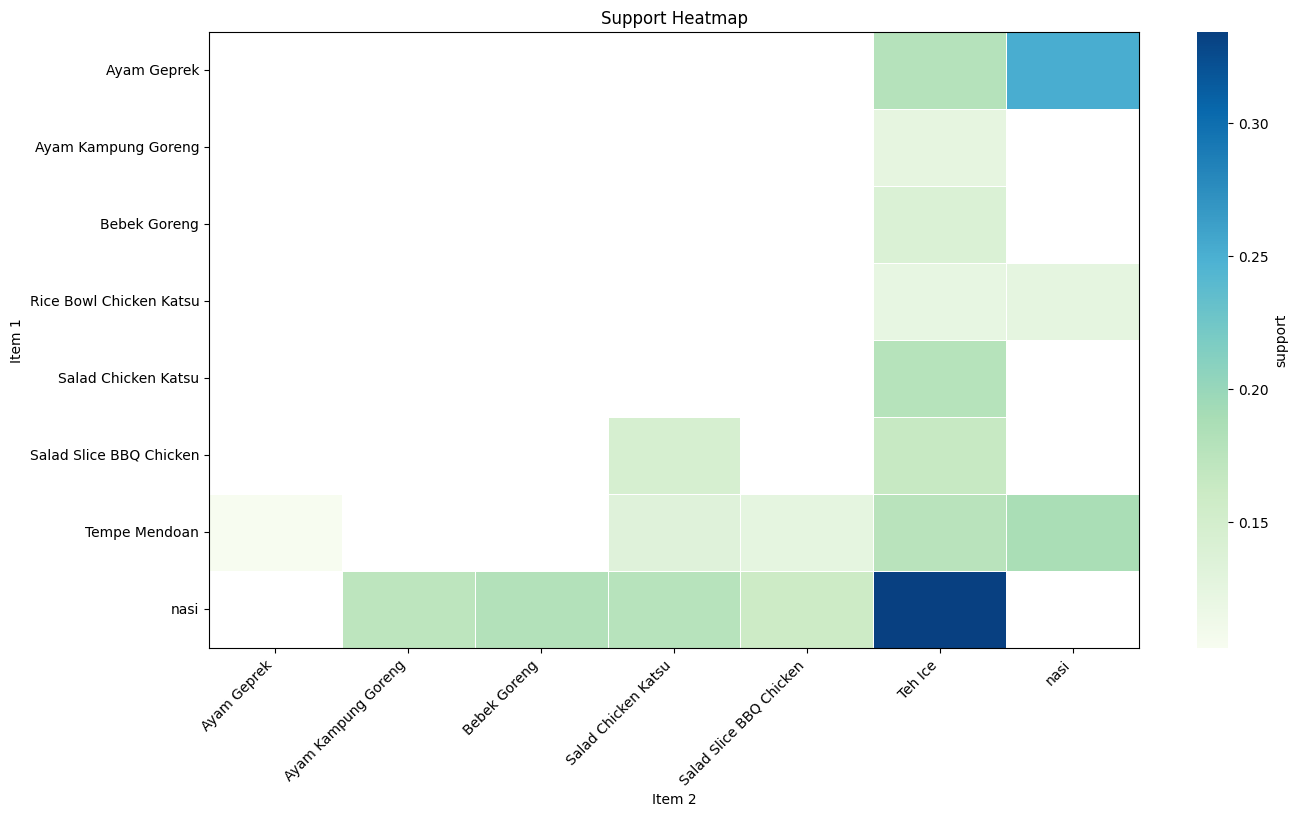

In [ ]:
top_pairs['Item 1'] = top_pairs['itemsets'].apply(lambda x: list(x)[0])
top_pairs['Item 2'] = top_pairs['itemsets'].apply(lambda x: list(x)[1])

heatmap_data = pd.crosstab(top_pairs['Item 1'], top_pairs['Item 2'], values=top_pairs['support'], aggfunc='mean', dropna=True)

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=False, cmap='GnBu', fmt=".1f", cbar_kws={'label': 'support'},linewidths=0.5)
plt.title('Support Heatmap')
plt.xticks(rotation=45, ha='right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.xlabel('Item 2')
plt.ylabel('Item 1')
plt.show()

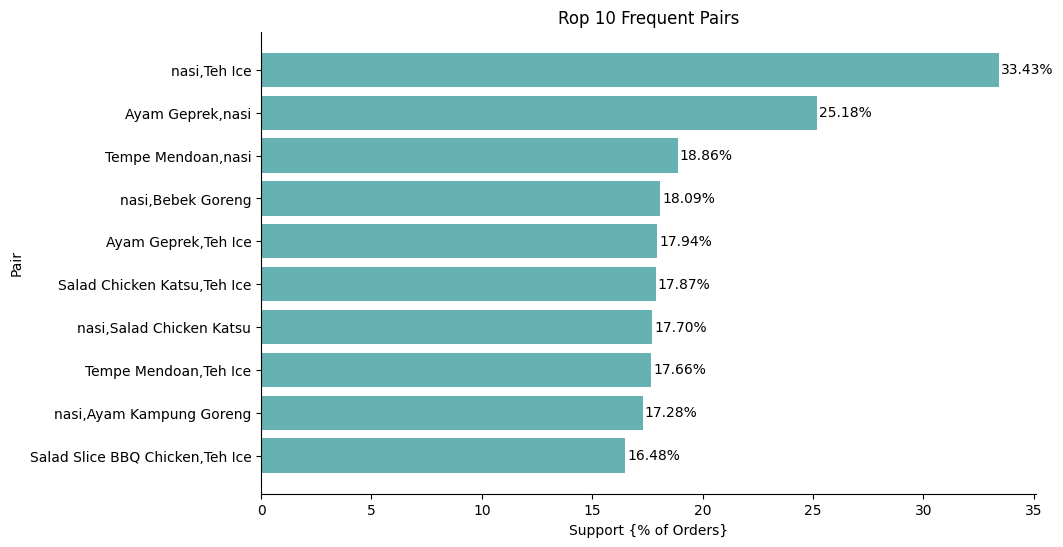

In [ ]:
top_pairs = frequentitemsets[frequentitemsets['itemsets'].apply(lambda x: len(x) == 2)].sort_values(by='support', ascending=False).head(10)

top_pairs['itemsets'] = top_pairs['itemsets'].apply(lambda x: ','.join(list(x)))
pairs = top_pairs['itemsets']
support_values = top_pairs['support']*100

plt.figure(figsize = (10,6))
bars = plt.barh(pairs, support_values, color='#66b2b2')
for bar in bars :
  plt.text(bar.get_width()+0.1, bar.get_y()+ bar.get_height()/2,
           f'{bar.get_width():.2f}%', va='center', ha='left', color='black', fontsize=10)
plt.xlabel("Support {% of Orders}")
plt.ylabel('Pair')
plt.title("Rop 10 Frequent Pairs")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
plt.show()

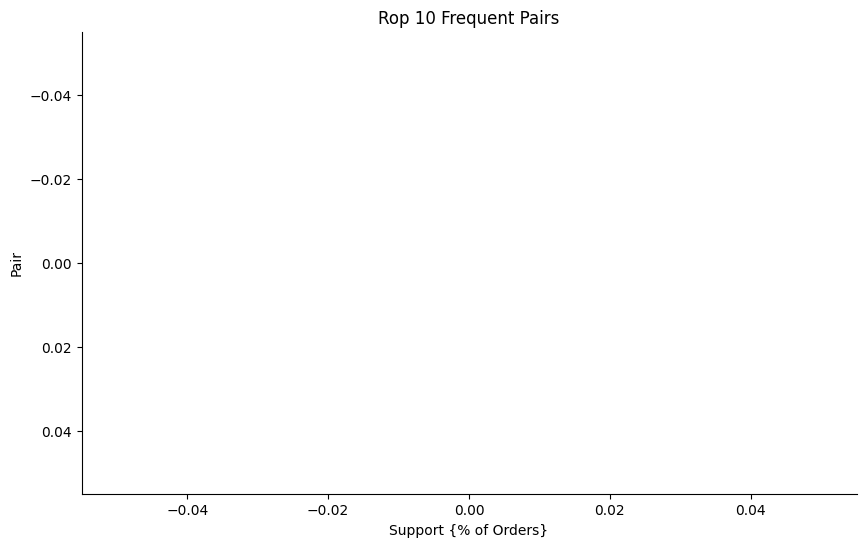

In [ ]:
top_pairs = frequentitemsets[frequentitemsets['itemsets'].apply(lambda x: len(x) == 4)].sort_values(by='support', ascending=False).head(10)

top_pairs['itemsets'] = top_pairs['itemsets'].apply(lambda x: ','.join(list(x)))
pairs = top_pairs['itemsets']
support_values = top_pairs['support']*100

plt.figure(figsize = (10,6))
bars = plt.barh(pairs, support_values, color='#66b2b2')
for bar in bars :
  plt.text(bar.get_width()+0.1, bar.get_y()+ bar.get_height()/2,
           f'{bar.get_width():.2f}%', va='center', ha='left', color='black', fontsize=10)
plt.xlabel("Support {% of Orders}")
plt.ylabel('Pair')
plt.title("Rop 10 Frequent Pairs")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
raw_rules = association_rules(frequentitemsets, metric='lift', min_threshold=1)
rules = raw_rules[['antecedents', 'consequents','support','confidence', 'lift']].sort_values(by='lift', ascending=False)
rules

,antecedents,consequents,support,confidence,lift
51,"(nasi, Teh Ice)",(Bebek Goreng),0.139694,0.417893,2.266718
54,(Bebek Goreng),"(nasi, Teh Ice)",0.139694,0.757725,2.266718
42,(Ayam Geprek),"(Tempe Mendoan, nasi)",0.100984,0.387097,2.052118
39,"(Tempe Mendoan, nasi)",(Ayam Geprek),0.100984,0.535347,2.052118
53,(nasi),"(Bebek Goreng, Teh Ice)",0.139694,0.286587,2.038304
...,...,...,...,...,...
17,(nasi),(Rice Bowl Chicken Katsu),0.125712,0.257902,1.130552
18,(Salad Slice BBQ Chicken),(Salad Chicken Katsu),0.146556,0.401989,1.037407
19,(Salad Chicken Katsu),(Salad Slice BBQ Chicken),0.146556,0.378216,1.037407
21,(Teh Ice),(Salad Chicken Katsu),0.178664,0.392603,1.013186


In [ ]:
rules['rule'] = rules['antecedents'].apply(lambda x: ','.join(sorted(x))) + '-->' + rules['consequents'].apply(lambda x: ','.join(sorted(x)))
rules = rules[['rule'] + [col for col in rules.columns if col != 'rule']]
rules = rules.reset_index(drop=True)
rules

,rule,antecedents,consequents,support,confidence,lift
0,"Teh Ice,nasi-->Bebek Goreng","(nasi, Teh Ice)",(Bebek Goreng),0.139694,0.417893,2.266718
1,"Bebek Goreng-->Teh Ice,nasi",(Bebek Goreng),"(nasi, Teh Ice)",0.139694,0.757725,2.266718
2,"Ayam Geprek-->Tempe Mendoan,nasi",(Ayam Geprek),"(Tempe Mendoan, nasi)",0.100984,0.387097,2.052118
3,"Tempe Mendoan,nasi-->Ayam Geprek","(Tempe Mendoan, nasi)",(Ayam Geprek),0.100984,0.535347,2.052118
4,"nasi-->Bebek Goreng,Teh Ice",(nasi),"(Bebek Goreng, Teh Ice)",0.139694,0.286587,2.038304
...,...,...,...,...,...,...
65,nasi-->Rice Bowl Chicken Katsu,(nasi),(Rice Bowl Chicken Katsu),0.125712,0.257902,1.130552
66,Salad Slice BBQ Chicken-->Salad Chicken Katsu,(Salad Slice BBQ Chicken),(Salad Chicken Katsu),0.146556,0.401989,1.037407
67,Salad Chicken Katsu-->Salad Slice BBQ Chicken,(Salad Chicken Katsu),(Salad Slice BBQ Chicken),0.146556,0.378216,1.037407
68,Teh Ice-->Salad Chicken Katsu,(Teh Ice),(Salad Chicken Katsu),0.178664,0.392603,1.013186


In [ ]:
rules[(rules['lift']>1) & (rules['confidence']>0.8)]

,rule,antecedents,consequents,support,confidence,lift
5,"Bebek Goreng,Teh Ice-->nasi","(Bebek Goreng, Teh Ice)",(nasi),0.139694,0.993554,2.038304
7,"Ayam Kampung Goreng,Teh Ice-->nasi","(Ayam Kampung Goreng, Teh Ice)",(nasi),0.123511,0.986556,2.023947
11,"Ayam Geprek,Tempe Mendoan-->nasi","(Tempe Mendoan, Ayam Geprek)",(nasi),0.100984,0.982368,2.015354
13,Bebek Goreng-->nasi,(Bebek Goreng),(nasi),0.180865,0.981039,2.012629
15,"Ayam Geprek,Teh Ice-->nasi","(Ayam Geprek, Teh Ice)",(nasi),0.175945,0.980519,2.011562
18,Ayam Geprek-->nasi,(Ayam Geprek),(nasi),0.251813,0.965261,1.980258
20,Ayam Kampung Goreng-->nasi,(Ayam Kampung Goreng),(nasi),0.172838,0.938159,1.924658


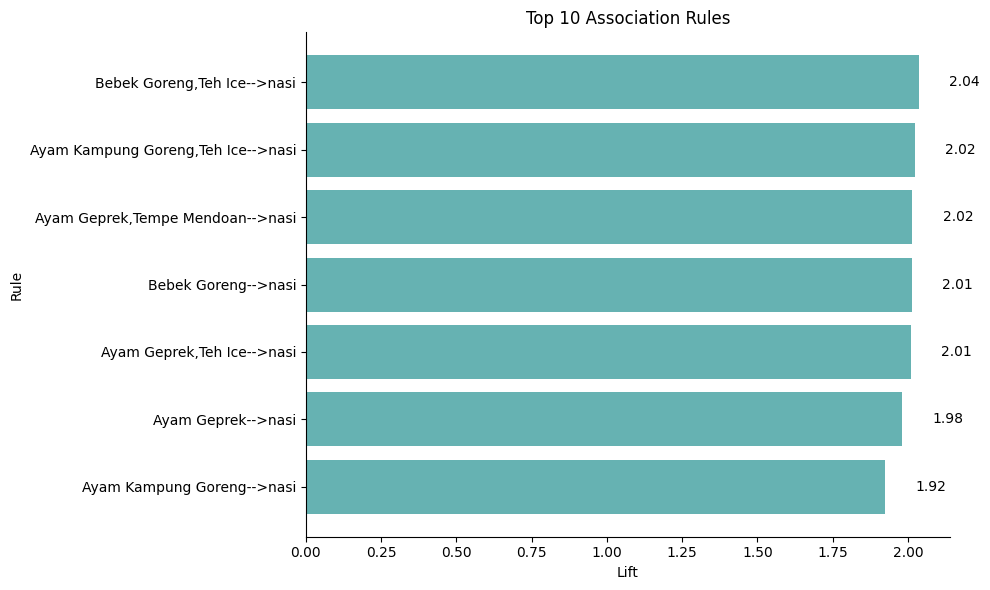

In [ ]:
filtered_rules = rules[(rules['confidence'] > 0.8) & (rules['lift'] > 1)]
top10_rules = filtered_rules.sort_values(by='lift', ascending=False).head(10)
rule_labels = top10_rules['rule']
lift_values = top10_rules['lift']
plt.figure(figsize=(10, 6))
bars = plt.barh(rule_labels, lift_values, color='#66b2b2')
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', color='black', fontsize=10)
plt.xlabel("Lift")
plt.ylabel("Rule")
plt.title("Top 10 Association Rules")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
fig = px.histogram(filtered_df, x='Produk',
                   title='Item Distribution')
fig.show()